In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import io

In [24]:
# Open the file in binary mode and read the content as bytes
with open('output.csv', 'rb') as f:
    content = f.read()

In [25]:
# Decode the byte string using the iso-8859-1 codec
df = pd.read_csv(io.StringIO(content.decode('iso-8859-1')))

In [26]:
df.head()

,Question,Answer,Marks
0,Write down the generic process framework that ...,Common process frame work - Process frame work...,2
1,List the goals of software engineering?,"Satisfy user requirements , High reliability ,...",2
2,What is the difference between verification an...,Verification refers to the set of activities t...,2
3,For the scenario described below: which life c...,You are interacting with the MIS department of...,2
4,Give two reasons why system engineers must und...,1.The reason for the existence of a system is ...,2


In [27]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [28]:
# Preprocess the text data
vectorizer = CountVectorizer()
encoder = LabelEncoder()

In [29]:
X_train = vectorizer.fit_transform(train_df['Question'] + '*#*' + train_df['Answer'])
X_test = vectorizer.transform(test_df['Question'] + '*#*' + test_df['Answer'])

In [30]:
print(X_train)

  (0, 764)	1
  (0, 2785)	36
  (0, 2771)	1
  (0, 1297)	15
  (0, 1725)	10
  (0, 604)	6
  (0, 232)	7
  (0, 1724)	1
  (0, 2335)	1
  (0, 1907)	16
  (0, 1299)	1
  (0, 2784)	5
  (0, 2943)	7
  (0, 2827)	8
  (0, 200)	1
  (0, 204)	12
  (0, 2684)	1
  (0, 2967)	3
  (0, 2169)	1
  (0, 2791)	1
  (0, 859)	4
  (0, 2879)	2
  (0, 1416)	1
  (0, 127)	5
  (0, 1726)	21
  :	:
  (105, 343)	4
  (105, 2352)	3
  (105, 1449)	1
  (105, 2035)	1
  (105, 2039)	2
  (105, 1316)	1
  (105, 1364)	1
  (105, 2460)	2
  (105, 2557)	1
  (105, 1721)	2
  (105, 3047)	2
  (105, 2059)	1
  (105, 923)	1
  (105, 2563)	1
  (105, 866)	1
  (105, 3045)	1
  (105, 146)	1
  (105, 502)	1
  (105, 1315)	1
  (105, 1818)	1
  (105, 347)	1
  (105, 1200)	2
  (105, 1901)	1
  (105, 199)	1
  (105, 159)	1


In [31]:
y_train = encoder.fit_transform(train_df['Marks'])
y_test = encoder.transform(test_df['Marks'])

In [32]:
print(y_test)

[3 4 3 9 1 9 7 1 3 3 4 0 9 1 1 1 1 0 0 2 4 0 3 1 1 9 1]


In [33]:
# Train the SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
# Save the trained model
import pickle

with open('subjective_analysis_svm_model.pkl', 'wb') as f:
    pickle.dump(clf, f)
with open('subjective_analysis_vector.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [35]:
# Test the SVM classifier
y_pred = clf.predict(X_test)

In [36]:
y_pred

array([1, 1, 1, 9, 2, 4, 2, 1, 4, 3, 1, 1, 4, 1, 6, 4, 1, 1, 1, 6, 3, 1,
       1, 1, 1, 4, 4], dtype=int64)

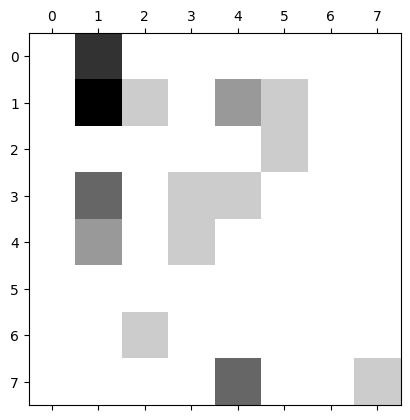

In [37]:
# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.gray_r)
plt.show()

In [40]:
# Predict marks for one user input data
question = """What is your name? My name is Abhay Sanjay Rayate

"""
user_input_vec = vectorizer.transform([question])
predicted_marks = clf.predict(user_input_vec)
print("Predicted Marks: {:.2f}".format(predicted_marks[0]))

Predicted Marks: 2.00
